##  Agenda
- We will deep dive into what unstructured data are
 
- Why and what **data processing techniques** are performed on it




Link to Download the data folder: https://drive.google.com/drive/folders/1JTjmLLzUT1J_a6WO6xJpxXXQDR4fNEGW?usp=sharing

## Image

So before we start, lets look into this image:

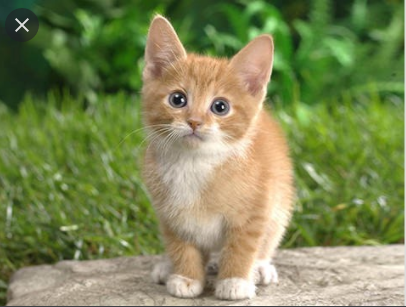





#### what all can we see ?
* Grass 
* Rock
* Cat

Now what if we want to **crop out the cat** from the rest of the image

How can we do it?
* By **figuring** out the **colors that belong to the cat** in the image. 
* Then create an **outline over the cat** to **crop it out.**

So when we select these set of colors of cat and draw an outline over it, 
* we **call the cat region (Green Mask) as Foreground** while the **rest of the part (Gray Mask) as our Background.**






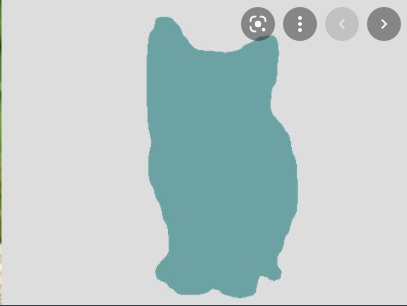

#### Now how can we make a computer algorithm to do the same task ?

* Maybe by **manually providing** the computer those **combination of colors which belong to cat**

BUT 

### Imagine,  you have **million of images** now and you want to **crop cat** in each of them.  

* Will it be **possible** for you **to manually select color** for each of the cat in different images?
* Maybe,  but this **method will take a lot of time**




Lets take another example:

Supposedly You were ask to **create mask for each and every object** we see in the image.

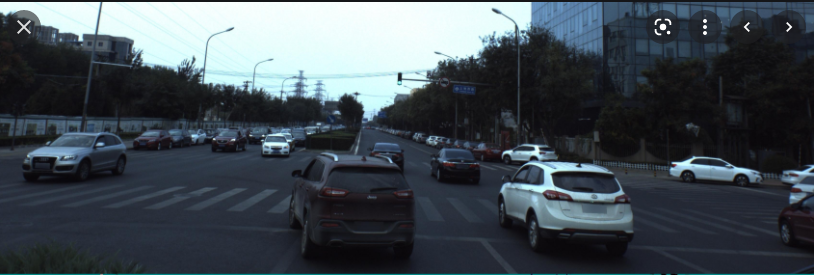

So our image looks like this:


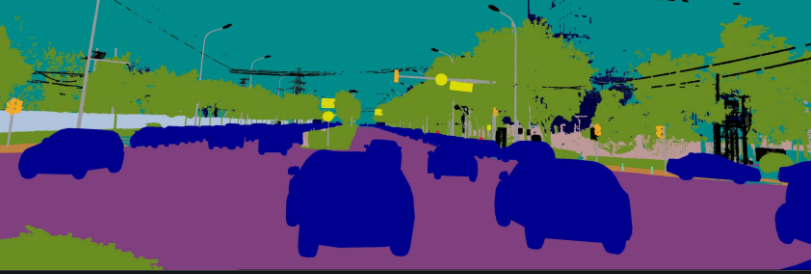


Now will the **set of color combinations** work for **each of the car** we see in the image?
* Maybe few of the **white cars might get masked**

BUT

* It will **cause issue with the black cars** and the **dark green trees** due to **their same color.** 

Also will it  be even **feasible** for us **to choose which point of the image belong to which object**?

* This, **demands for an automatic processing** of image so as to **filter
out useful information** like for e.g. extracting car in the image for a Self Driving Car


With this, 
### Task: Lets segment out car (foreground) from the background


 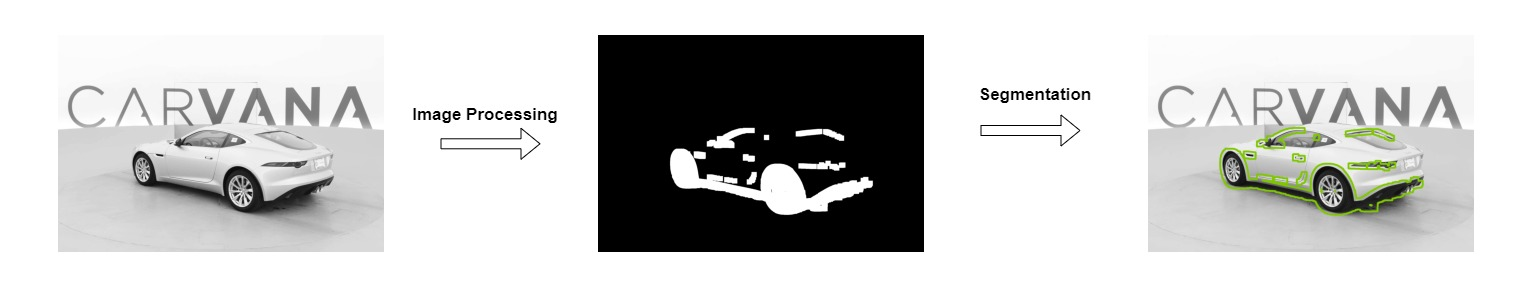

first we will load the data !

* We will be using opencv library which is an **open source library**  for image processing tasks. 

` 


In [1]:
import cv2 # loads the opencv library


In [2]:
image_files  = 'car1.jpg'
img = cv2.imread(image_files)
print('Shape of the Image:',img.shape)
print(img)


Shape of the Image: (1280, 1918, 3)
[[[248 242 247]
  [248 242 247]
  [248 242 247]
  ...
  [230 229 233]
  [230 229 233]
  [230 229 233]]

 [[248 242 247]
  [248 242 247]
  [248 242 247]
  ...
  [230 229 233]
  [230 229 233]
  [230 229 233]]

 [[248 242 247]
  [248 242 247]
  [248 242 247]
  ...
  [230 229 233]
  [230 229 233]
  [230 229 233]]

 ...

 [[212 212 212]
  [211 211 211]
  [210 210 210]
  ...
  [223 222 226]
  [223 222 226]
  [223 222 226]]

 [[210 212 212]
  [209 211 211]
  [208 210 210]
  ...
  [225 224 228]
  [225 224 228]
  [225 224 228]]

 [[210 212 212]
  [209 211 211]
  [208 210 210]
  ...
  [227 226 230]
  [227 226 230]
  [227 226 230]]]


* Notice how **image is just a 3-D matrix** with width of 1280 and height of 1918 .

BUT 
#### what is that 3 in the shape of the image ?
* Recall how **color plays an important role** for **identifying the object in image** 
* So the **3 is actually the Red, Green, Blue (R,G,B) channels** of the image which together shows the colors in the image. 


#### So what are these numbers we see when we print the image variable ?
* So each number is a **pixel of the image**  which when **combined** together **over the R,G,B channels** forms a color at a **particular point** on the image.
* The pixel values ranges from **0-255 with 0 meaning no color for that channel** is used and **255 meaning the maximum bright color of the channel** is used.


Lets take an example:


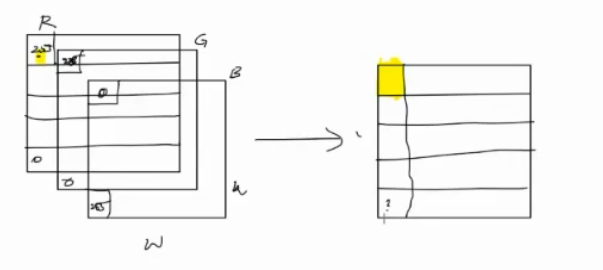

* Supposedly we have pixel values at R = 255, G=255 and B=0, 

#### What can we understand from it
*  That the **point on the image** will be of the **shade yellow** 
* As the **only the Red and Green color are combining** together.

now if the bottom pixels have the value R=0,G=0 and B=255
#### What will be the color for that point in the image?
* Blue



With these concepts of the image, lets now **visualize our image** in python
* For visualizing in python,  `matplotlib`  is used which is an open source library for that can **create static, animated, and interactive visualizations.** 

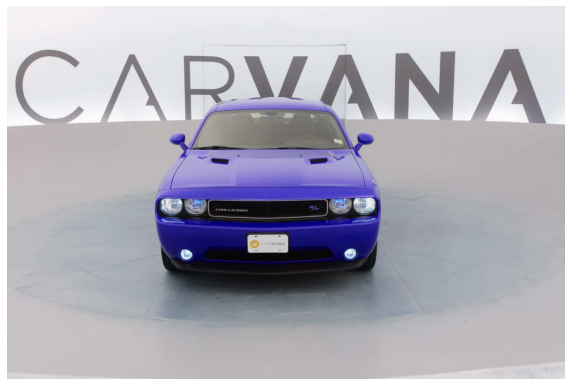

In [3]:
import matplotlib.pyplot as plt # for visualising the image
#plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.show()

Now, this car was suppose to be loaded as red but it was loaded as blue. Why is that ?

* opencv's `imread` loads image in **Blue, Green, Red (BGR) channel** 

BUT

* `imshow` expects it to be in  Red, Green, Blue **(RGB) channel**

So what are these channels in the image?

Lets perform the conversion

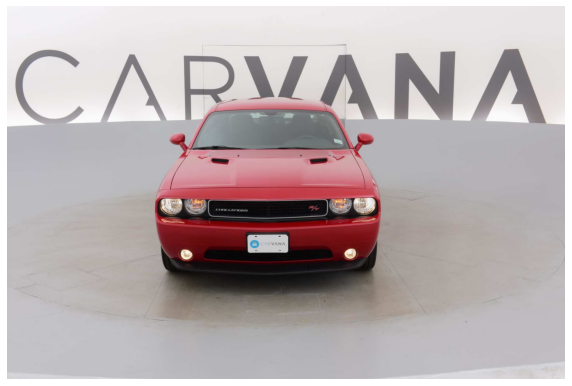

In [4]:
# Converts BGR to RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.axis(False)
plt.show()

### GrayScale
- Notice  in the image, the **car parts have different shades of red** in it

Recall that image is just a 3-D matrix of numbers. 

- So an **automatic system** might **consider these small car parts** as completely **different objects** due to **different  pixel intensity values**.


BUT
- For us, we are able to figure out the **different shades of red being the part of the  car** 

### Now how can we make a computer resistant to different shades of red ?
- So **apart from R,G,B channels** there are **variety of channel formats** that can be used.

- the most common being **grayscaling the image** which is **convert RGB image to shades of gray.** 
  - It **varies between complete black** ( For **most non-luminous** object) and **complete white** ( for **most-luminous object**).
 
Lets see whether Grayscaling the image help in making the image resistant to different shades of red !






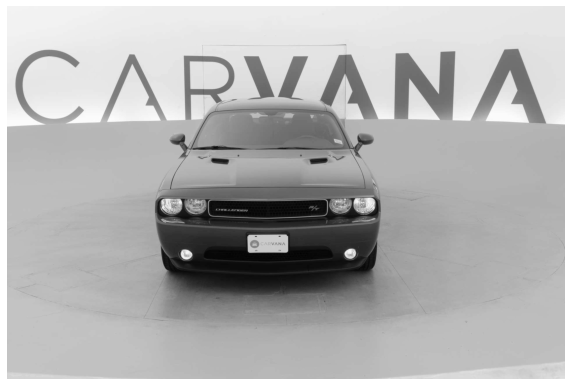

In [5]:
# Converts RGB to GRAY
gray_img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray_img,cmap='gray')
plt.axis(False)
plt.show()

- Notice how Grayscaling, **gives a white shade** to the **headlights of the car as they are the luminous object**

AND
- give a **black shade to the tires of the car**

ALSO

- Notice how Grayscaling **mostly gave the same shade of gray to the car**

BUT
- **Lacked in giving a same shade to the upper and lower part of the car**

### HSV

With this we discuss HSV which is another channel formatting

So the other format that might help in making the computer resistant  
- We change the R,G,B channel to its Hue, Saturation and Value components.  


- Hue component represents **different colours in different angle ranges.**
  - And **clustering the shades of same color** to a **same region in the cone**

- **Saturation** describes the **percentage of the colour** with value lying in the range 0 to 1. 
  - 0 being the gray and 1 being the primary colour. 

- The **value** represents the **percentage  intensity of the colour** with 0 being darkest and 100 being the brightest intensity.
 

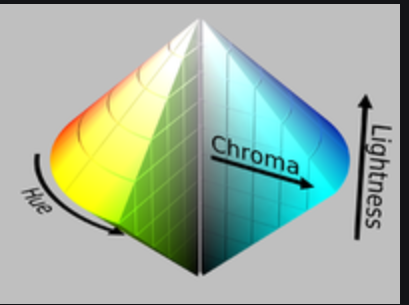

- Notice in the cone, how similiar shades are clustered together
- Also notice the **color shade becomes lighter** as we **go up the cone** 

Lets **understand** this with **an example of apple on a table**
  * Notice how we can **clearly distinguish which part of the image is apple** and which part is the table.

  * Even though there are **different shades of red** on the  **apple** 
   


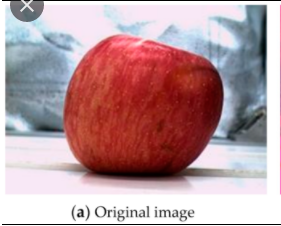

When we perform the HSV on the image:
- Though there are **small regions** which are **different in color** than the majority of the apple 
- The Hue Saturation Value was **clearly able to separate** out the apple from the table 

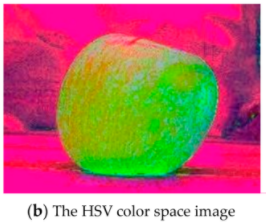

So lets see how **HSV channel** affects our Car image !

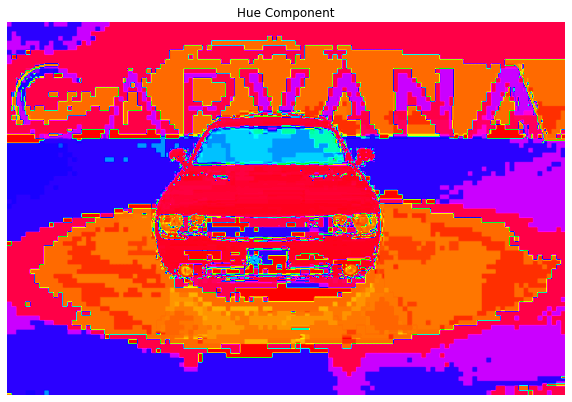

In [6]:
img1 = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
plt.figure(figsize=(10,10))

# Hue Component
plt.title('Hue Component')
plt.imshow(img1[:,:,0],cmap='hsv')
plt.axis(False)
plt.show()

Notice how **Hue component did not work** and gave the same color component to most of the image.

Lets see how Value component performed

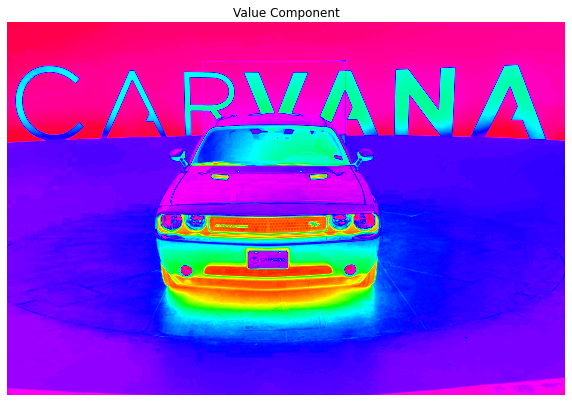

In [7]:
# Value Component
plt.figure(figsize=(10,10)) 

plt.title('Value Component')

plt.imshow(img1[:,:,2],cmap='hsv')
plt.axis(False)
plt.show()

- Notice how **Value component was only able to separate the small parts** of the car from the rest of the image
- **Might have worked if we wanted to get small parts of the car** from the image like Driver Liscense Plate

- Still lacks in separating the majority of car 

Lets see how Saturation Component performed!

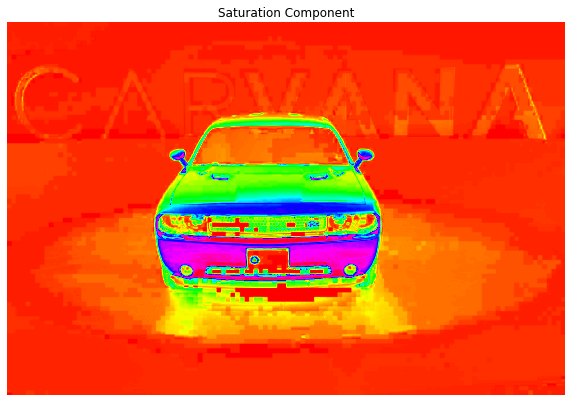

In [8]:
# Saturation Component
plt.figure(figsize=(10,10)) 

plt.title('Saturation Component')
plt.imshow(img1[:,:,1],cmap='hsv')
plt.axis(False)
plt.show()

- **Saturation did a great job in separating the car from the background** of the image 
- Still it **lacks in giving the same component** for the different parts of the car **espically the bumper and headlights of the car.**

### Smoothing

#### So how can we reduce this color variations in these small parts of the car?
Lets take an example :



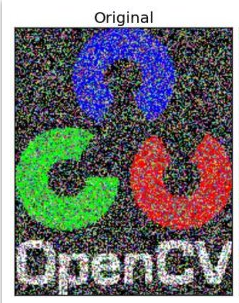

- We have an opencv logo image
- Notice the small noises on the entirity of the image 

BUT

- We are still able to figure out the larger part of the opencv logo Eg. the Blue, Green and Red part of the logo. 

#### So how were we able to separate the blue region even with the small objects?
* By **smoothening or blurring the intensity** of the small objects near the blue region.  




### Now how can we make computer do the similar smoothening task 

* Supposedly we draw a plot of the intensities of the image.



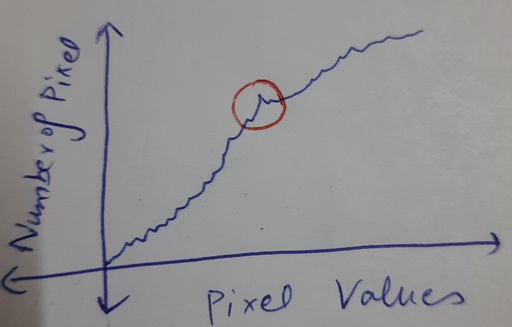

* The **red region is the Blue part** of our opencv image
* Notice the **rough pixel intensity** caused **due to those small objects**    

#### So what all can we perform to smoothen up these rough peaks?
* Maybe taking **average of the surrounding area**
* Maybe taking **median of the surrounding area**

We see that **replacing the pixel intensities with a value similar to the surrounding areas** does the trick ! 

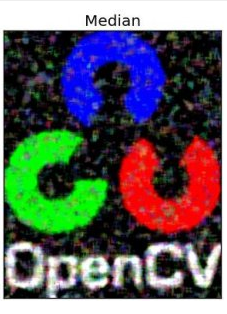



So with the **same intuition**, lets **consider a blue pixel** of the image with the intention to smoothen it !

#### so how much neighboring region should we consider to smoothen the pixel?
- Maybe considering only a **3x3 region around the pixel help**
- Or maybe considering a **15x15 region around the pixel help**
- The **choosing the right region** comes with **practice** ! 

So how does these selected region smoothes the image ?
- These selected regions are  passed over a **kernel** which is a **matrix** containing some values through which we replace the pixel intensity with.

To better understand this, lets take an example

- Supposedly **the blue pixel has a pixel intensity of** (60)



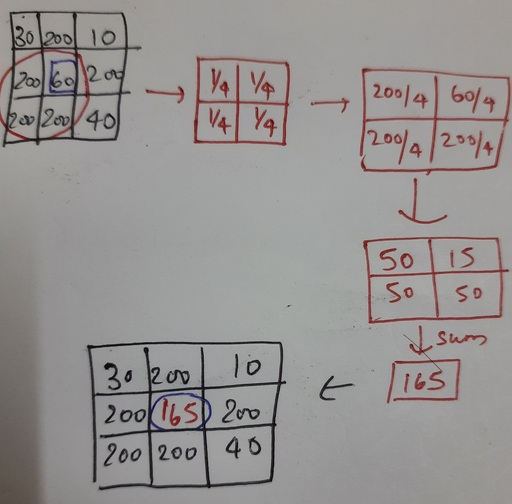

- Now a 2x2 region is selected 
- This **seleced region** is then **passed over a 2x2 Kernel matrix which gives an equal weight to each of the pixel intensities**.
- It computes the **average and replaces 60 with 165** 


So with this lets now perform smoothening over our image and see how it effects the image !

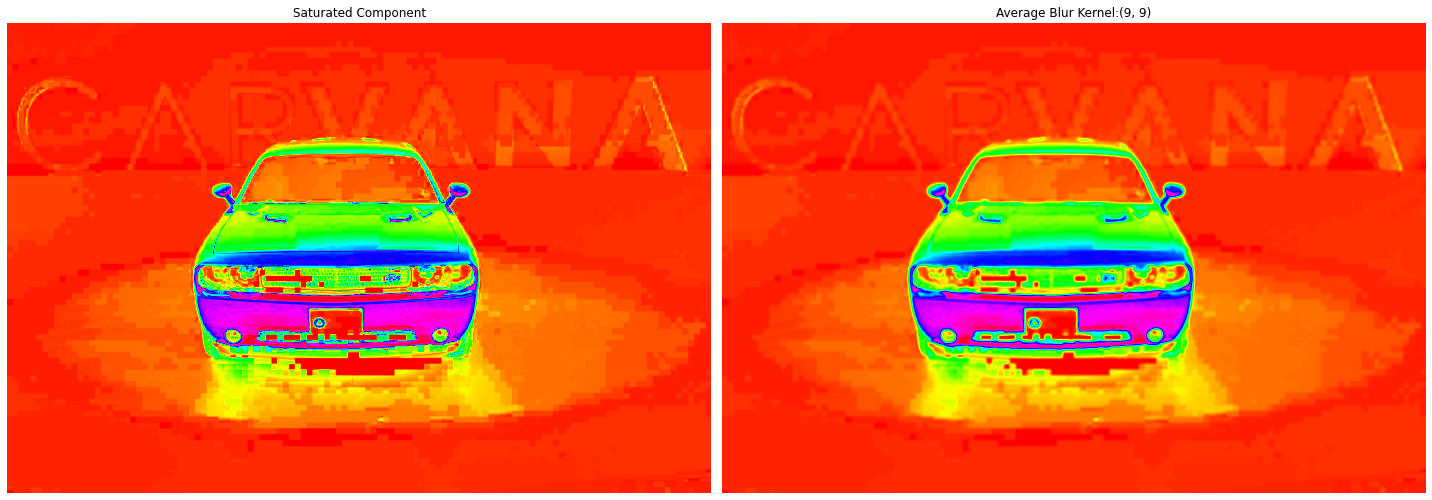

In [9]:
fig,ax = plt.subplots(1,2,figsize=(20,20))  
img2 = img1[:,:,1]
kernel_size = (9,9)

  # Applying Blurring
smoothen_img = cv2.blur(img2,kernel_size)

ax[0].set_title(f'Saturated Component') 
ax[0].imshow(img2,cmap='hsv')
ax[0].axis(False)
  
ax[1].set_title(f'Average Blur Kernel:{kernel_size}') 
ax[1].imshow(smoothen_img,cmap='hsv')
ax[1].axis(False)

plt.tight_layout()
plt.show()



- Notice how a **9x9 Kernel is able to smooth small parts** of the car but still it can be smoothened a bit more  

Lets try a higher kernel 

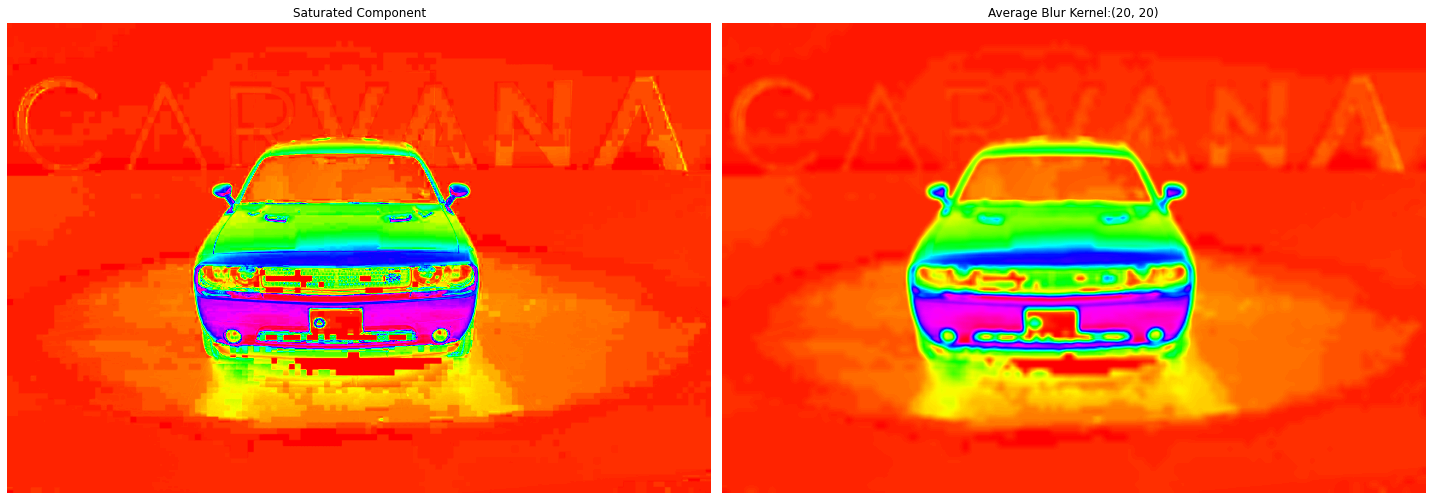

In [10]:
fig,ax = plt.subplots(1,2,figsize=(20,20))  
img2 = img1[:,:,1]
kernel_size = (20,20)

  # Applying Blurring
smoothen_img = cv2.blur(img2,kernel_size)

ax[0].set_title(f'Saturated Component') 
ax[0].imshow(img2,cmap='hsv')
ax[0].axis(False)
  
ax[1].set_title(f'Average Blur Kernel:{kernel_size}') 
ax[1].imshow(smoothen_img,cmap='hsv')
ax[1].axis(False)

plt.tight_layout()
plt.show()



- Notice how the **region near driver liscense plate** and the **region just below the windsheld has been smoothen up**

- Notice as we **increase the kernel** size the **details of the image decreases**
#### So which kernel to use and when ?
- This mainly depends upon the foreground object 
- If the **object is quite small** like determining the car logo or driver plate information of the car, **then a kernel of size 9x9 might  work**

BUT
- if the **object is large** like the entire car, **kernel of size 20x20 works** just fine  


### Thresholding 

Now that our image is smoothen,

we can **try to separate the car** from the background.

### Recall when we tried separating the cat, we created a foreground for it.

#### So how can we automatically create a foreground for our image ? 
- Maybe **select a particular pixel intensity** and **any value greater than it can be considered as our foreground mask.**



Lets take an example:
  * Supposedly we want to **segement out coins** from the image


  





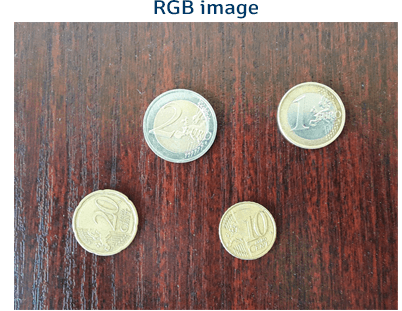

#### So how can we decide which threshold pixel value to select ? 
- If we notice, the **number of pixels belonging to the coin are < the background pixels**
- So maybe by **plotting the number of pixels** that **have the same pixel values** ,
we can **find a threshold pixel value from which the number of pixel is quite low**

- This plotting of image is called Histogram of the image



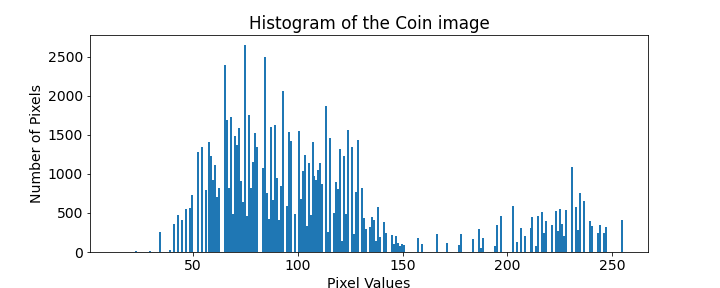


*  Now if we plot the Histogram of the Grayscale image, we see 
  
  - **Most** of the **pixel values lies between 50 to 150** which can be **taken as background**
  - **Value after 150 has a much less number of pixels** hence **can be considered as the threshold.**

* We take a **threshold pixel value of 155.**
* So **any pixel intensity > 155** will be **considered as foreground** by assigning it a value of 1
* And **pixel intensity <= 155** will be **considered as background** by assigning it a value of 0
* The **image with pixel values as either 1 or 0** is called **Binary Image**  

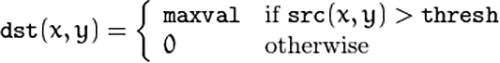

- This method of assigning pixel intensity as threshold is called thresholding 


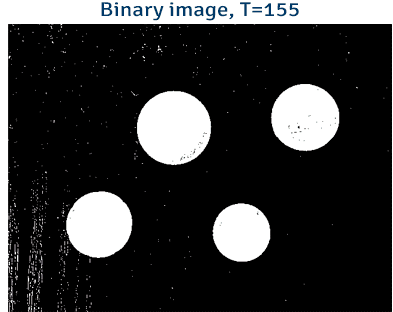

* Notice how the **coins got separated** out **along with some noise**.

So how can we reduce this noise ?
- By using **larger threshold** values of **160,170,180**

#### How can we figure out the correct threshold value?
- This is **quite experimental and comes with practising**

Lets implement thresholding on our car image to separate the car from the background !


We start by plotting the histogram plot for our image

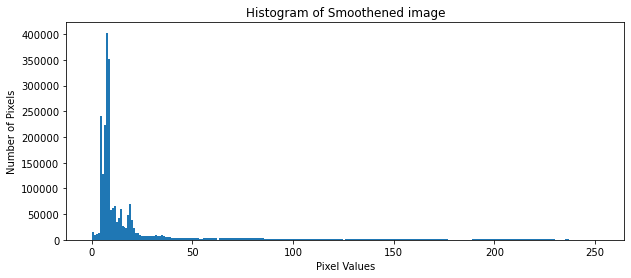

In [11]:
plt.figure(figsize=(10,4))
plt.hist(smoothen_img.ravel(), bins=256)
plt.title('Histogram of Smoothened image')
plt.ylabel('Number of Pixels')
plt.xlabel('Pixel Values')
plt.savefig('histogram')
plt.show()

Notice how majority of the pixels have value between 0-50

AND

How most of the pixels capture the car object, so maybe a threshold of 30 might work  

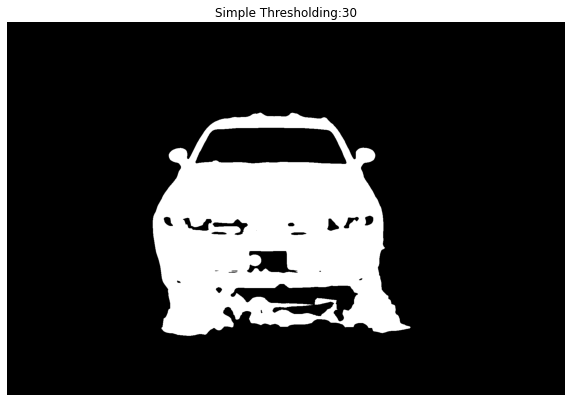

In [12]:
_,thresh_img = cv2.threshold(smoothen_img,30,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.title(f'Simple Thresholding:{30}')
    
# Simple Thresholding

plt.imshow(thresh_img,cmap='gray')
plt.axis(False)
plt.show()

- Notice how a **threshold of 30 includes the entire car**

BUT
- It also **includes noise at the bottom part** of the car

Lets try another threshold with value 50

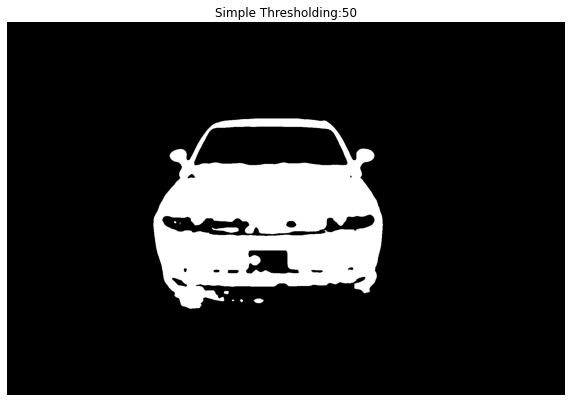

In [13]:
_,thresh_img = cv2.threshold(smoothen_img,50,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.title(f'Simple Thresholding:{50}')
    
# Simple Thresholding

plt.imshow(thresh_img,cmap='gray')
plt.axis(False)
plt.show()

Notice how threshold = 50 was able to **segment the car** from background

#### But we see there are still part of the car which was not able to be segmented. 
- Like the headlight, driver licsence of the car



### Morphological Operations

#### How can we add these small parts to the foreground mask without including much noise ?
- Maybe using a different threshold value

BUT 

#### Recall **how time consuming** it is for **manually deciding threshold** when the there are **million of images or >1 object** in the image.

-  We can automatically **remove or add pixels** in the foreground mask using **Morphological Operations**

Lets take an example to understand the need and types of Morphological Operations:
- Supposedly we have a foreground mask of the object (shown in image) 

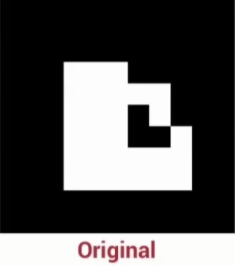

- Notice how a **small part of the foreground mask** has a **value 0** (hence black in color.)


### **Dilation**


#### So to add this part into the foreground mask what can we do ?
- Maybe **for a particular pixel**, look into **its neighboring region** and **if any of those pixels** in the region are **part of the foreground then add the selected pixel to foreground mask**.
- This **method of expanding** the foreground mask is called **Dilation.**

#### But how can we decide how much neighorboring pixel to consider?
- Recall how **we used kernels**, similar to it here we **use a structuring element** 
- The only **difference between kernel and Structuring element** is that **kernel has to have a fixed size** i.e a square or rectangular shape. 

WHILE 
- **Strucuturing element can have any shape**: 1-D Vector, Rhombus  

Lets take an example to understand how structuring elements performs  dilation:
- Supposedly we have an **foreground mask with some missing pixels.**
- and we are using a **structuring element of shape 1x3**


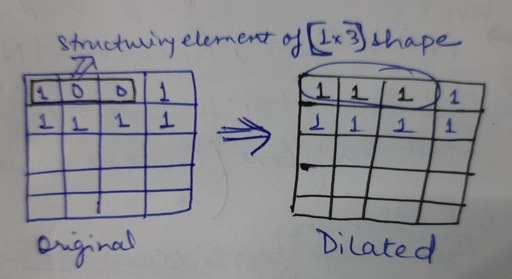

- Notice how for dilation, we **take a max of the selected region** and **replace each pixel in the region with the maximum.**

#### Can dilation cause issues ?
- Might include noises 
- Might create a **foreground mask which exceeds the actual shape of the object.**
- Might **connect two different foreground masks together**.

We can see it in the example image:

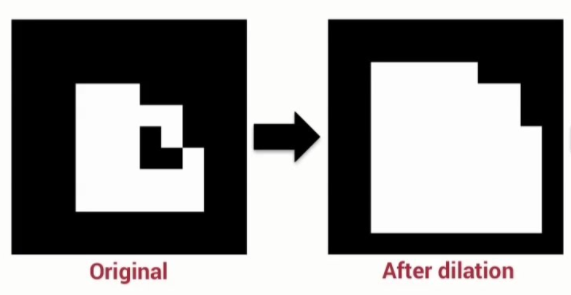

-Notice how dilation adds the missing part to the foreground mask 

BUT
- **size of foreground mask exceeds** the actual size of the object

### Erosion

#### So what can we do to get the original mask size ?
- Maybe now do the **inverse of what Dilation did.**
- Recall **in Dilation**, how the **structuring element selects a part of the image and took the maximum** to replace each pixel with that value



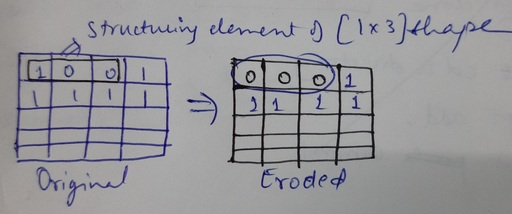

- Now **instead of Maximum if we replace each pixel with its minimum**, it will shrink the foreground mask.
- This method of shrinking of foreground is called Erosion.

We can see it in the example image, 


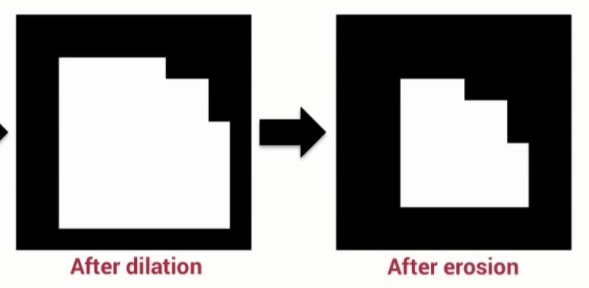

* Notice how **dilation adds the missing part** of the foreground mask 

And

* Notice how **Erosion reduces the size of dilated mask while retaining what dilation did**  

Lets now Implement these morphological operations on to our Image data

Applying dilation for 15 iterations on the threshold image

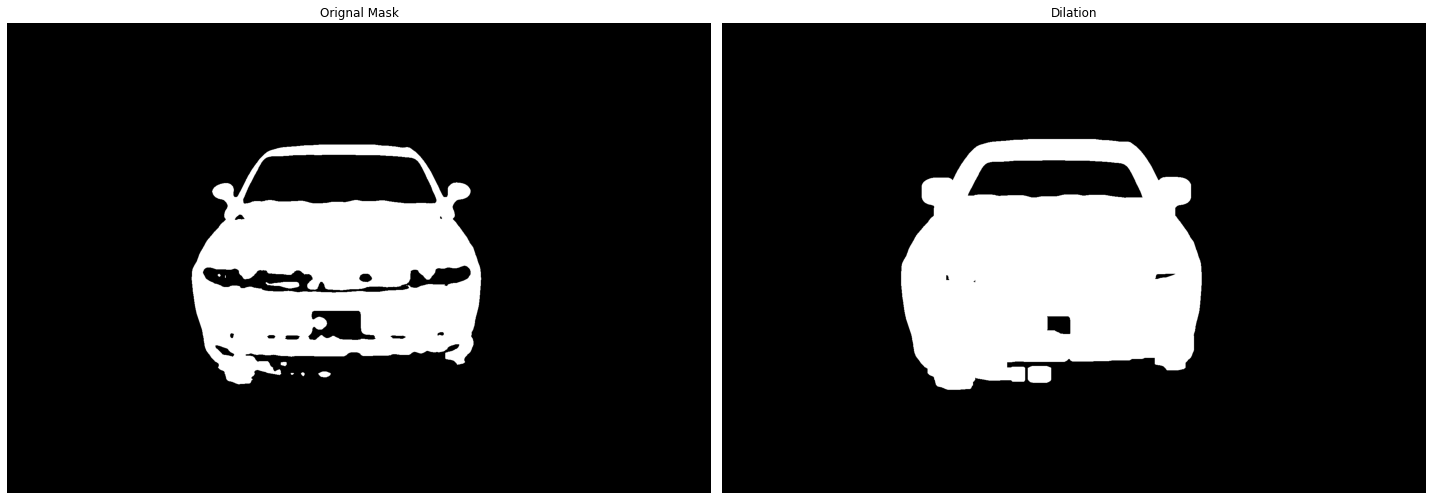

In [14]:
fig,ax = plt.subplots(1,2,figsize=(20,15)) 


dilate = cv2.dilate(thresh_img,None,iterations= 15)

ax[0].set_title(f'Orignal Mask')
ax[1].set_title(f'Dilation')

# Simple Thresholding
ax[0].imshow(thresh_img,cmap='gray')
ax[0].axis(False)

#Dilation
ax[1].imshow(dilate,cmap='gray')
ax[1].axis(False)
 
plt.tight_layout()
plt.show()




Notice how **Dilation completely captured the front bumper objects!**
- Also notice **Dilation added more pixels** around the **rear view mirror and the windshield area.**

Lets perform Erosion !


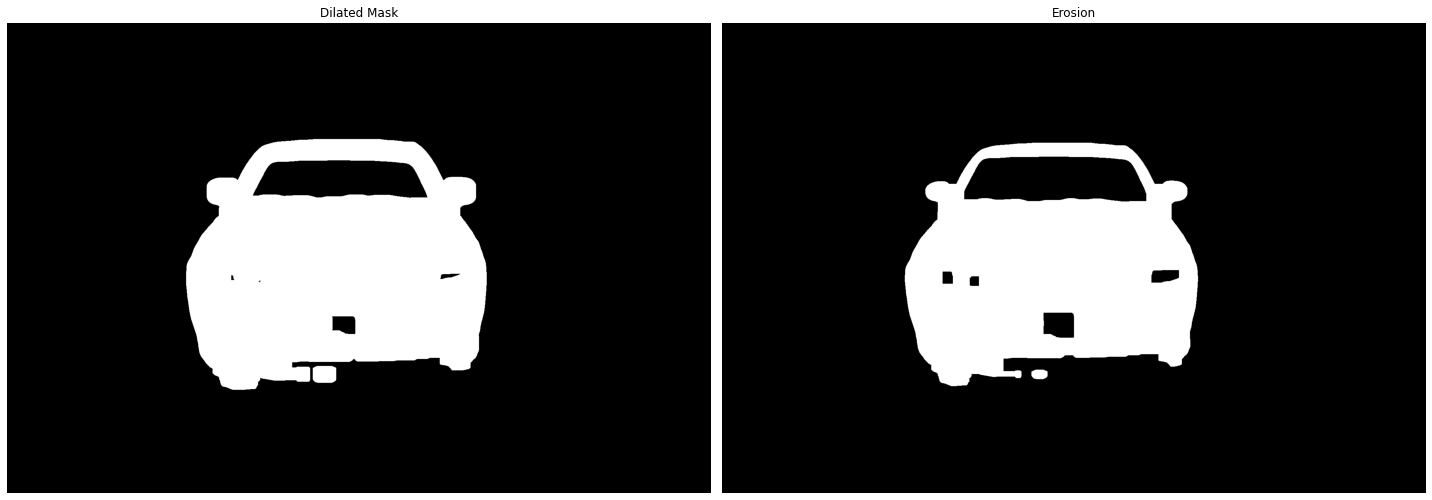

In [15]:
fig,ax = plt.subplots(1,2,figsize=(20,15)) 


erode = cv2.erode(dilate,None,iterations= 10)

ax[0].set_title(f'Dilated Mask')
ax[1].set_title(f'Erosion')

# dilate
ax[0].imshow(dilate,cmap='gray')
ax[0].axis(False)

#Erosion
ax[1].imshow(erode,cmap='gray')
ax[1].axis(False)
 
plt.tight_layout()
plt.show()








- Notice how **Erosion retained what Dilation did** but still **reduced the Foreground mask.** 


### Contours
Now that we have the foreground mask, 
#### how can we draw the foreground mask on the original image ?
- **draw an outline of the foreground masks** over the image
 
- These **drawing of line over the boundary target object is called Contour.** 



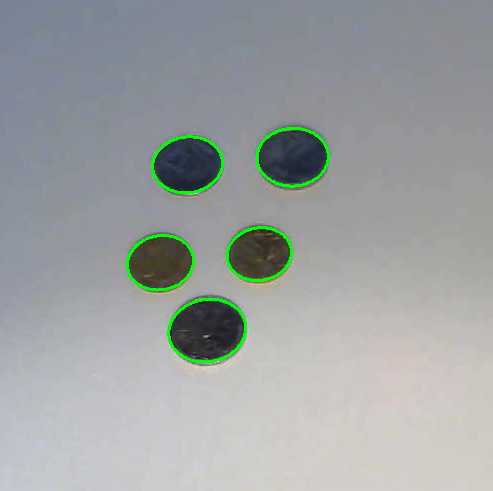

#### How to decide which contour to draw first on the image ? 
* It **depends on position** of the contours which creates **a heirarchy** among them
Like for example:
* The **contour 0 , 1 and 2** are considered at the **same heirarchy level** as they are **not inside any contours**. 
* then contours 2a and 3 are selected since **it is the child contour to 2**
* While contours **4 and 5 are selected last** 



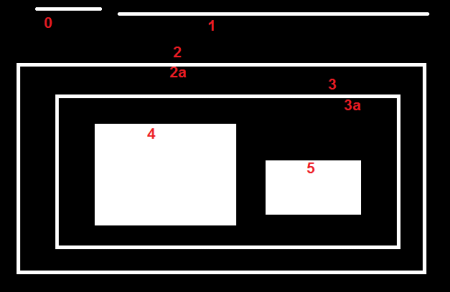

* Now With the basic opencv features covered, **lets get back to segmentation of Car**



### Back to Problem Statement
Lets load a new set of car samples

`cv2.RETR_LIST` **retrives all the contours information** by **considering all in same hierarchy level.**


`cv2.CHAIN_APPROX_NONE` **stores all the boundary points** of the contour 

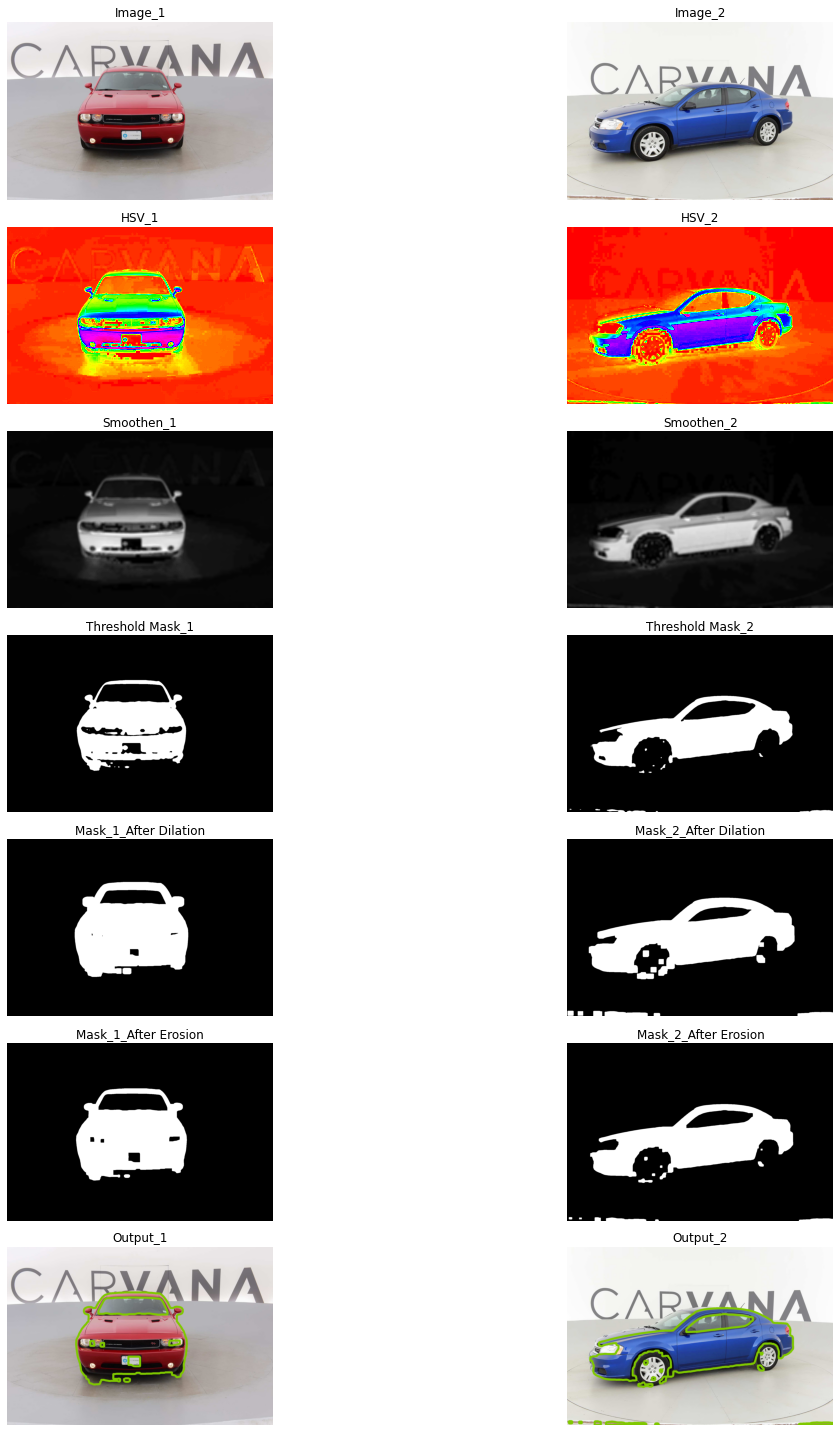

In [16]:
fig,ax = plt.subplots(7,2,figsize=(20,20)) 
image_files  = ['car1.jpg','car3.jpg']

for idx,files in enumerate(image_files):
  img = cv2.imread(files)
  org_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) 
  img = cv2.cvtColor(org_img,cv2.COLOR_RGB2HSV)
  
  img = img[:,:,1]

  blurred_img = cv2.blur(img,(20,20))
  
  _,thresh_img = cv2.threshold(blurred_img,50,255,cv2.THRESH_BINARY)
  
  dilated = cv2.dilate(thresh_img,None,iterations= 15)
  eroded = cv2.erode(dilated,None,iterations= 10)
  
  contours,_ = cv2.findContours(eroded,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
  final_img = cv2.drawContours(org_img.copy(),contours, -1, (127,200,0), 13)
  
  ax[0,idx].set_title(f'Image_{idx+1}')
  ax[0,idx].imshow(org_img)
  ax[0,idx].axis(False) 

  ax[1,idx].set_title(f'HSV_{idx+1}')
  ax[1,idx].imshow(img,cmap='hsv')
  ax[1,idx].axis(False) 

  ax[2,idx].set_title(f'Smoothen_{idx+1}')
  ax[2,idx].imshow(blurred_img,cmap='gray')
  ax[2,idx].axis(False)

  ax[3,idx].set_title(f'Threshold Mask_{idx+1}')
  ax[3,idx].imshow(thresh_img,cmap='gray')
  ax[3,idx].axis(False)

  ax[4,idx].set_title(f'Mask_{idx+1}_After Dilation')
  ax[4,idx].imshow(dilated,cmap='gray')
  ax[4,idx].axis(False)

  ax[5,idx].set_title(f'Mask_{idx+1}_After Erosion')
  ax[5,idx].imshow(eroded,cmap='gray')
  ax[5,idx].axis(False)

  ax[6,idx].set_title(f'Output_{idx+1}')
  ax[6,idx].imshow(final_img)
  ax[6,idx].axis(False)   

plt.tight_layout()
plt.show()


- We still notice that there **were still noises** in the data

Hence
- **Image processing** is used as a **pre processing step** for **Machine Learning** algorithms so they **perform much better** with the **more refined image** than the **raw ones.**  
   